# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-15 23:55:26--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-15 23:55:27--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip.1’

c

In [ ]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
replace customer_shopping_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [ ]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [ ]:
print("Información general del DataFrame:")
df.info()

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:

print(df.describe())
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}: {df[col].nunique()} valores únicos")

                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000

invoice_no: 99457 valores únicos

customer_id: 99457 valores únicos

gender: 2 valores únicos

category: 8 valores únicos

payment_method: 3 valores únicos

invoice_date: 797 valores únicos

shopping_mall: 10 valores únicos


Considero que las columnas age, gender, category y payment_method son críticas para segmentar a los clientes,
porque nos permiten identificar distintos tipos de compradores que pueden ser según su edad, género, tipo de producto preferido y forma de pago, lo cual esto es clave para poder crear estrategias de marketing personalizadas.

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [ ]:
print("Valores nulos por columna:\n")
print(df.isnull().sum())
print("\nPorcentaje de valores nulos:\n")
print((df.isnull().mean() * 100).round(2))

Valores nulos por columna:

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Porcentaje de valores nulos:

invoice_no        0.0
customer_id       0.0
gender            0.0
age               0.0
category          0.0
quantity          0.0
price             0.0
payment_method    0.0
invoice_date      0.0
shopping_mall     0.0
dtype: float64


No hay valores nulos

## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [ ]:
df['total_value'] = df['quantity'] * df['price']
df[['invoice_no', 'quantity', 'price', 'total_value']].head()

,invoice_no,quantity,price,total_value
0,I138884,5,1500.40,7502.00
1,I317333,3,1800.51,5401.53
2,I127801,1,300.08,300.08
3,I173702,5,3000.85,15004.25
4,I337046,4,60.60,242.40


Se podría extraer año y mes de la fecha, para así poder analizar la estacionalidad o tendencias de compra. Además, tambien se podría categorizar a los clientes según su gasto así segmentar por capacidad adquisitiva

## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

In [ ]:
corporate_palette = ['#0033A0', '#FF6600', '#FFFFFF']

sns.set(style='whitegrid', palette=corporate_palette)

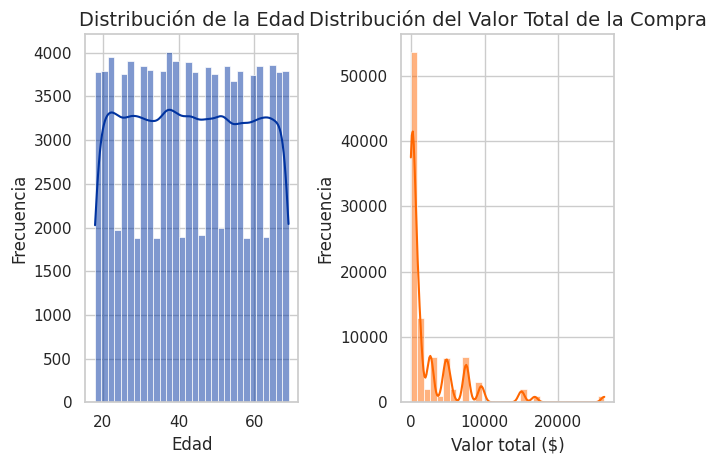

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True, color=corporate_palette[0])
plt.title('Distribución de la Edad', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
sns.histplot(df['total_value'], bins=30, kde=True, color=corporate_palette[1])
plt.title('Distribución del Valor Total de la Compra', fontsize=14)
plt.xlabel('Valor total ($)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

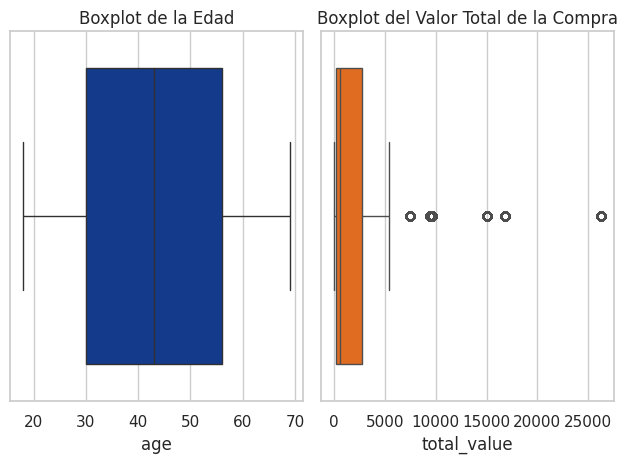

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'], color=corporate_palette[0])
plt.title('Boxplot de la Edad')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['total_value'], color=corporate_palette[1])
plt.title('Boxplot del Valor Total de la Compra')

plt.tight_layout()
plt.show()

En la edad se observa que la distribución de edades parece bastante equilibrada entre los 25 y los 60 años, sin valores atípicos evidentes. Con esto se puede concluir que los clientes se concentran dentro de un rango de adultos económicamente activos, por lo que no habría necesidad de eliminar registros.

En cambio en el Valor total de la compra aquí sí se observan valores atípicos, especialmente en el extremo superior compras que superan los 10.000 o incluso 25.000.
Con estos datos se pueden inferir que representan:

Clientes con compras excepcionales que pueden ser potenciales clientes VIP. O incluso errores de registro o transacciones duplicadas.

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

Jóvenes (18–30 años): Etapa de exploración y formación de hábitos de consumo.

Estrategia: Campañas digitales en redes sociales, promociones y mensajes con tono fresco y dinámico.

Adultos (31–50 años): Grupo económicamente más activo, con mayor poder adquisitivo.

Estrategia: Comunicación enfocada en conveniencia, calidad y beneficios a largo plazo.

Mayores (51+ años): Buscan estabilidad, confianza y atención personalizada.

Estrategia: Mensajes más cercanos, canales tradicionales y programas de fidelización.

Cruce con género:

Mujeres: Pueden priorizar factores emocionales y la experiencia del servicio o producto.

Hombres: Pueden responder mejor a mensajes centrados en la eficiencia, funcionalidad o estatus.

Ejemplo de aplicación:

Jóvenes mujeres: campañas en Instagram o TikTok con lenguaje moderno.

Adultos hombres: anuncios en LinkedIn o newsletters con enfoque en rentabilidad o inversión.

Mayores mujeres: correos personalizados con beneficios exclusivos y asesoría directa.

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

In [ ]:
cat_freq = df['category'].value_counts()
pay_freq = df['payment_method'].value_counts()
mall_freq = df['shopping_mall'].value_counts()
behavior_segment = pd.crosstab(df['category'], df['payment_method'])
print(behavior_segment)

payment_method    Cash  Credit Card  Debit Card
category                                       
Books             2268         1696        1017
Clothing         15456        12025        7006
Cosmetics         6674         5336        3087
Food & Beverage   6587         5250        2939
Shoes             4474         3553        2007
Souvenir          2211         1770        1018
Technology        2235         1753        1008
Toys              4542         3548        1997


El método de pago y la categoría de producto son las variables de mayor impacto, porque muestran tanto el poder adquisitivo como las preferencias de consumo del cliente.
Por ejemplo, quienes usan tarjeta de crédito suelen tener una mayor disposición al gasto y pueden responder mejor a promociones con bancos o programas de puntos, mientras que las categorías más compradas como moda o tecnología permiten definir mensajes personalizados y segmentar campañas específicas por interés.

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

In [ ]:
age_category = pd.crosstab(df['age_group'], df['category'])
age_category_prop = pd.crosstab(df['age_group'], df['category'], normalize='index') * 100
print(age_category_prop)

category            Books   Clothing  Cosmetics  Food & Beverage      Shoes  \
age_group                                                                     
Jóvenes          5.130542  34.748356  14.818673        15.013998  10.091803   
Adultos jóvenes  4.827116  34.702765  15.189674        14.796159  10.115956   
Adultos          4.986523  34.777801  15.132352        14.873177  10.028336   
Mayores          5.069112  34.547519  15.365225        14.808454  10.121603   

category         Souvenir  Technology       Toys  
age_group                                         
Jóvenes          5.000326    4.889641  10.306661  
Adultos jóvenes  5.089459    5.047484  10.231387  
Adultos          4.958878    5.186951  10.055982  
Mayores          5.058032    4.936151  10.093903  


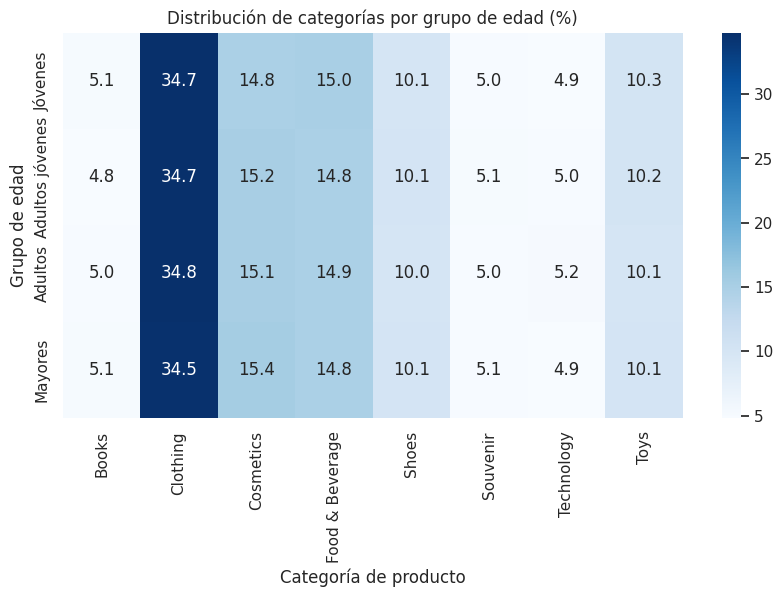

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(age_category_prop, cmap='Blues', annot=True, fmt=".1f")
plt.title('Distribución de categorías por grupo de edad (%)')
plt.ylabel('Grupo de edad')
plt.xlabel('Categoría de producto')
plt.show()

Los segmentos de adultos que compran tecnología y pagan con tarjeta de crédito podrían considerarse de alto valor, ya que combinan alto poder adquisitivo con afinidad hacia productos de mayor precio.

Asimismo, los jóvenes que compran moda y usan medios digitales de pago son relevantes por su potencial de fidelización a largo plazo.

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

In [ ]:
category_counts = df['category'].value_counts()
threshold = 0.03 * len(df)
small_categories = category_counts[category_counts < threshold].index
df['category_grouped'] = df['category'].apply(lambda x: 'Otros' if x in small_categories else x)
print(df['category_grouped'].value_counts())

category_grouped
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64


Agruparia Souvenir, technology y Books, porque son categorias con muy pocos registros, lo cuál se podría agrupar bajo una misma etiqueta, por jemplo otros.

## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [ ]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 25, 40, 60, 100],
    labels=['Jóvenes', 'Adultos', 'Mayores', 'Senior'])
df['category_grouped'] = df['category_grouped'].replace({
    'Clothing': 'Moda',
    'Shoes': 'Moda',
    'Accessories': 'Moda',
    'Phones': 'Tecnología',
    'Computers': 'Tecnología',
    'Groceries': 'Consumo diario',
    'Food': 'Consumo diario'})
df['segmento_combinado'] = (
    df['age_group'].astype(str) + ' - ' +
    df['category_grouped'].astype(str) + ' - ' +
    df['shopping_mall'].astype(str))
df[['age_group', 'category_grouped', 'shopping_mall', 'segmento_combinado']].head()

,age_group,category_grouped,shopping_mall,segmento_combinado
0,Adultos,Moda,Kanyon,Adultos - Moda - Kanyon
1,Jóvenes,Moda,Forum Istanbul,Jóvenes - Moda - Forum Istanbul
2,Jóvenes,Moda,Metrocity,Jóvenes - Moda - Metrocity
3,Senior,Moda,Metropol AVM,Senior - Moda - Metropol AVM
4,Mayores,Books,Kanyon,Mayores - Books - Kanyon


La combinación de grupo de edad + categoría de producto + shopping mall permite identificar dónde compran distintos tipos de clientes y qué prefieren adquirir.
Y si se agrega además el método de pago tarjeta, efectivo, digital, el segmento se vuelve aún más útil para definir estrategias como: Promociones bancarias específicas, campañas geolocalizadas por centro comercial.

## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

In [ ]:
segment_value = df.groupby('segmento_combinado')['total_value'].agg(['mean', 'sum', 'count']).reset_index()
segment_value = segment_value.sort_values(by='mean', ascending=False)
segment_value.head(10)

,segmento_combinado,mean,sum,count
128,Jóvenes - Technology - Viaport Outlet,13905.405405,514500.0,37
261,Senior - Technology - Emaar Square Mall,13376.086957,615300.0,46
267,Senior - Technology - Metropol AVM,13110.000000,917700.0,70
121,Jóvenes - Technology - Emaar Square Mall,12869.230769,501900.0,39
199,Mayores - Technology - Zorlu Center,12857.142857,1260000.0,98
190,Mayores - Technology - Cevahir AVM,12667.021277,1190700.0,94
269,Senior - Technology - Zorlu Center,12476.470588,424200.0,34
264,Senior - Technology - Kanyon,12356.779661,2187150.0,177
263,Senior - Technology - Istinye Park,12162.500000,1021650.0,84
198,Mayores - Technology - Viaport Outlet,12154.891304,1118250.0,92


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sum'].plot(kind='hist', bins=20, title='sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='mean', y='sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sum', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['sum'].plot(kind='line', figsize=(8, 4), title='sum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

Mayores - Technology - c: podría tener un alto valor promedio de compra, ya que los adultos con mayor poder adquisitivo tienden a adquirir productos tecnológicos de gama media o alta en centros comerciales premium.

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

1) Los segmentos con mayor valor promedio y frecuencia, encontramos que se combinan características de adultos o mayores con categorías de tecnología y moda en centros comerciales de alto tráfico o premium.  
Por ejemplo, el segmento Adultos, Tecnología, Andino estos muestran un alto ticket promedio, mientras que Jóvenes, Moda, Plaza Central estos muestran compras frecuentes aunque de menor valor.

2) Campañas de valor agregado: Donde se ofrezcan combos, descuentos o beneficios por compra repetida.  
- Gamificación o programas de puntos:Para poder incentivar la recurrencia de compra, buscando quee esto se de especialmente en jóvenes.  
- Personalización de ofertas: Usar canales digitales para adaptar mensajes según intereses y comportamientos.
3)  Por ejemplo la categoría define el tipo de gasto:  
  - Entonces Tecnología se observa que tenems menos compras frecuentes pero de alto valor.  
  - En cambio en Moda y consumo diario, son compras frecuentes, impulsivas y sensibles a promociones.  
- Por último el centro comercial influye en el poder adquisitivo y la experiencia del cliente:  
  - Centros premium: Andino, Santafé concentran clientes de mayor valor.  
  - Centros locales: Plaza Central, Titán Plaza agrupan consumidores más sensibles al precio.


## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

1) Luego de haber analizado las combinaciones de variables demográficas y comportamentales, creo que es optimo trabajar con 3 a 4 segmentos clave.  
Debido a que esto permite una personalización eficiente sin fragmentar demasiado el presupuesto ni generar esfuerzos duplicados.

Ejemplo de segmentación óptima:
- Adultos - Tecnología - Centros premium (Andino, Santafé)
- Jóvenes - Moda - Centros de conveniencia (Plaza Central, Titán)
- Mayores - Consumo diario - Centros locales
- Adultos - Moda - Centros premium
2) El mayor presupuesto se concentra en los segmentos de alto valor promedio o sea lo que tengan mayor ROI, mientras se mantienen esfuerzos de atracción y fidelización en los grupos de volumen como los jóvenes y adultos medios.
3) Alguno de los indicadores que usaría son: Ticket promedio por cliente, Tasa de recompra, Participación en ventas totales y el ROI por campaña
4) El segmento elegí fue el siguiente:
Adultos - Tecnología - Centros premium (Andino, Santafé)
Escogi este grupo porque muestra un alto valor promedio de compra, frecuencia moderada y una predisposición a productos de mayor margen. Lo que me muestra es que son clientes con poder adquisitivo alto, que se ven atraídos por la innovación y dispuestos a pagar más por calidad y servicio.
5) Estrategia: Experiencia Premium Tech

- Campaña:Actualízate con lo mejor de la tecnología”
- Acciones:
  - Ofertas exclusivas en lanzamientos (celulares, gadgets, laptops).  
  - Eventos VIP o demostraciones en centros premium.  
  - Bonos o cashback por compras con tarjetas aliadas.  
  - Newsletter segmentado con tips y recomendaciones tecnológicas.

Canales:
Email marketing, redes sociales (LinkedIn, Instagram Ads), y alianzas con marcas tecnológicas.
6) El monitoreo de la campaña se realizará mediante indicadores clave como el aumento en el valor promedio de compra, la frecuencia de transacciones por cliente y la tasa de conversión de las promociones dirigidas al segmento. Además, se analizará el retorno de inversión (ROI) de las campañas y el crecimiento del ticket promedio en comparación con periodos anteriores. El seguimiento se complementará con reportes mensuales que incluyan métricas de engagement (clics, aperturas, participación en promociones) y comportamiento en punto de venta o plataformas digitales, permitiendo ajustar la estrategia en tiempo real según los resultados obtenidos.
